In [1]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import *

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Stability & Error

In [2]:
stats = load_stablity_error_data(output_directory = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/',
                                run_name = "consensus_NMF")

min stablity is 0.4834388494491577
max stablity is 0.7346619963645935
min error is 431985920.0
max error is 459201984.0


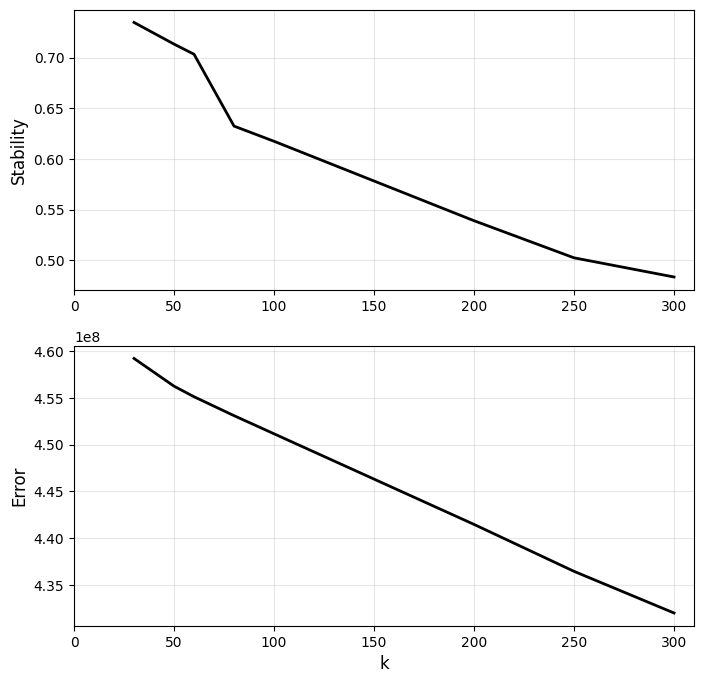

In [8]:
plot_stablity_error(stats)

# Enrichement tests

In [2]:
folder = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240807_cNMF_eval_pipeline_analysis"

In [3]:
count_df = load_enrichment_data(folder, components = [30, 60, 80, 100, 200, 250, 300])

min go_terms is 1074
max go_terms is 1345
min genesets is 631
max genesets is 774
min traits is 241
max traits is 322


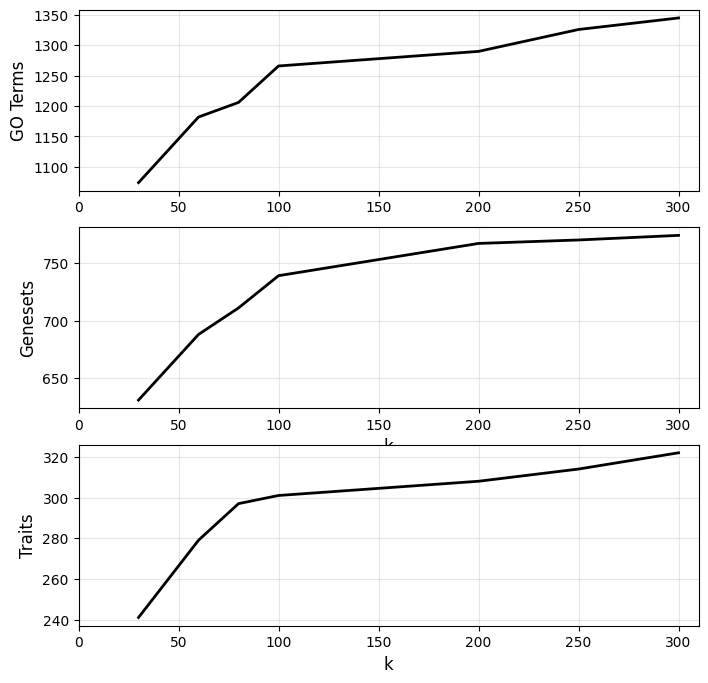

In [4]:
plot_enrichment_data(count_df)

# Perturbation

In [2]:
folder = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240807_cNMF_eval_pipeline_analysis"

In [3]:
from statsmodels.stats.multitest import fdrcorrection

test_stats_df = load_perturbation_data(folder, components = [30, 60, 80, 100, 200, 250, 300])

min regulators is 194
max regulators is 231


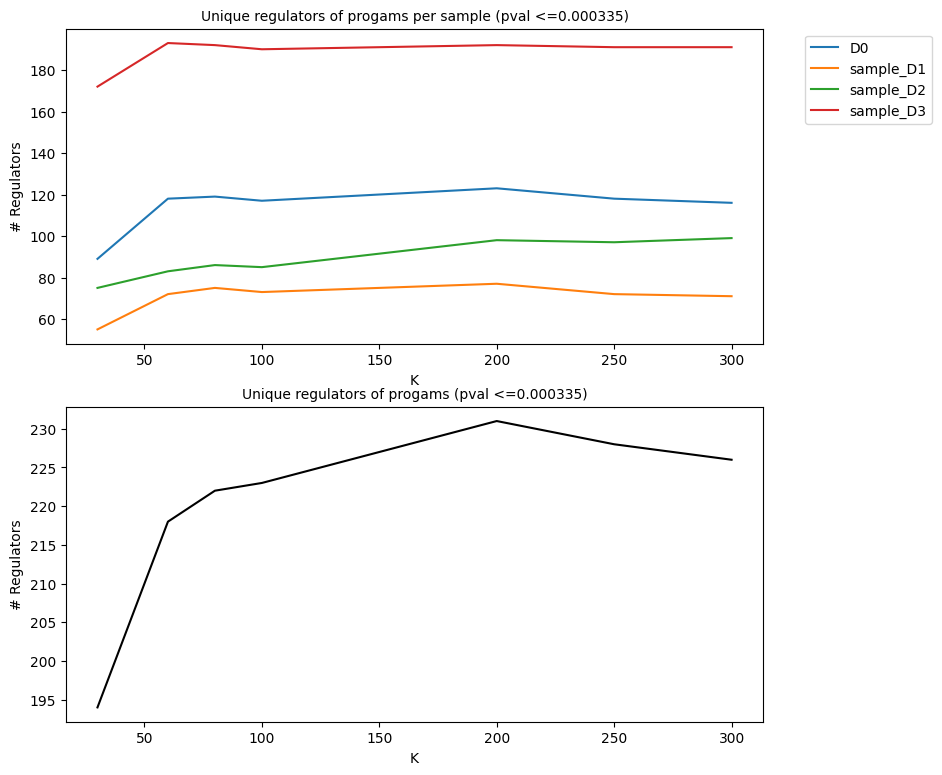

In [4]:
plot_perturbation(test_stats_df)

# Motif

In [ ]:
# Motif
# Import motif enrichments
motif_enrichment_data = []

path = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100'
for fil in os.listdir(path):
    if 'motif_enrichment' in fil:
        motif_enrichment_data_ = pd.read_csv('{}/{}'.format(path,fil), sep='\t')
        motif_enrichment_data_['sample'] = fil.split('sample_')[-1].split('_motif')[0]
        if 'promoter' in fil:
            motif_enrichment_data_['class'] = 'promoter'
        elif 'enhancer' in fil:
            motif_enrichment_data_['class'] = 'enhancer'            

        motif_enrichment_data.append(motif_enrichment_data_)

motif_enrichment_data = pd.concat(motif_enrichment_data, ignore_index=True)
motif_enrichment_data.to_csv(f'{path}/cNMF_30_motif_enrichment.txt', sep='\t')
motif_enrichment_data.loc[motif_enrichment_data['class']=='promoter'].to_csv(f'{path}/cNMF_30_motif_enrichment_promoter.txt', sep='\t')
motif_enrichment_data.loc[motif_enrichment_data['class']=='enhancer'].to_csv(f'{path}/cNMF_30_motif_enrichment_enhancer.txt', sep='\t')


# Make summary table column
for seq_class in ['promoter', 'enhancer']:
    motif_enrichment_data_ = motif_enrichment_data.loc[motif_enrichment_data['class']==seq_class]
    motif_enrichment_data_ = motif_enrichment_data_.groupby(['sample', 'program_name', 'motif']).min().reset_index()

    motif_summary_data = pd.DataFrame(index=motif_enrichment_data_.program_name.unique(), columns=['top10_motifs', 'num_enriched_motifs'])
    for prog in motif_enrichment_data_.program_name.unique():
        motif_summary_data_ = motif_enrichment_data_.loc[(motif_enrichment_data_.program_name==prog) & ((motif_enrichment_data_.adj_pval<=0.05))]
        motif_summary_data_ = motif_summary_data_.sort_values('stat', ascending=False).head(10).motif.values
        motif_summary_data.loc[prog,'top10_motifs'] = ', '.join(motif_summary_data_.tolist())
        motif_summary_data.loc[prog, 'num_enriched_motifs'] = motif_enrichment_data_.loc[(motif_enrichment_data_.program_name==prog) & ((motif_enrichment_data_.adj_pval<=0.05))].shape[0]
        
    motif_summary_data.to_csv('motif_summary_data_{}.txt'.format(seq_class), sep='\t')
    
# # Copy out to dashboard
# out_dir = '../../shared/250110_ipsc_ec_dashboard_setup/cNMF_100/'
# for fil in os.listdir('cNMF_100'):
#     if 'motif_' in fil:
#         class_ = fil.split('_')[1]
#         name = fil.split('_sample_')[1]
#         new_nam = f'cNMF_100_{class_}_test_pearsonr_sample_{name}'
#         if not name.startswith('D0'):
#             new_nam = new_nam.replace('sample_', 'sample_sample_')
#         os.system('cp {} {}'.format(os.path.join('cNMF_100', fil),
#                                     os.path.join(out_dir, new_nam)))